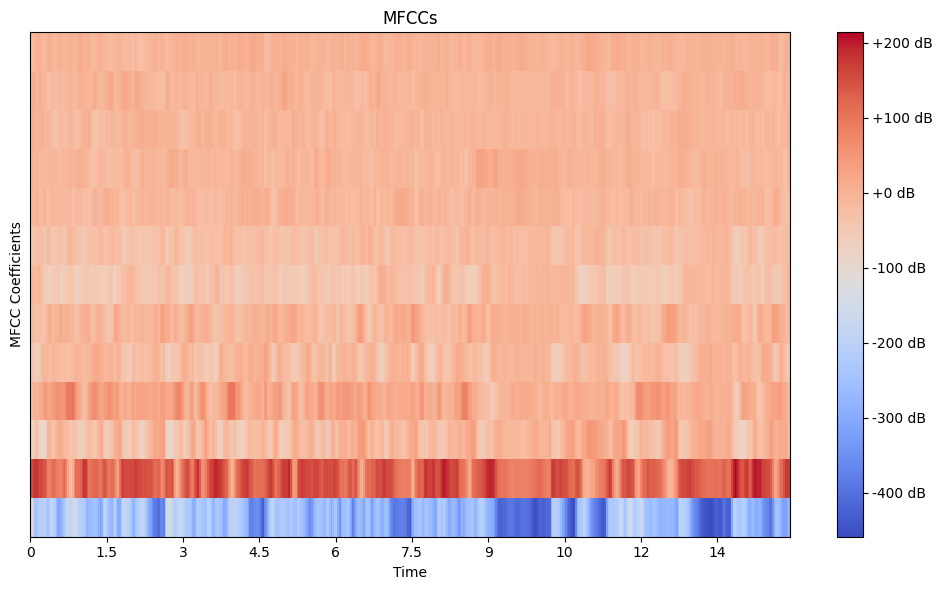

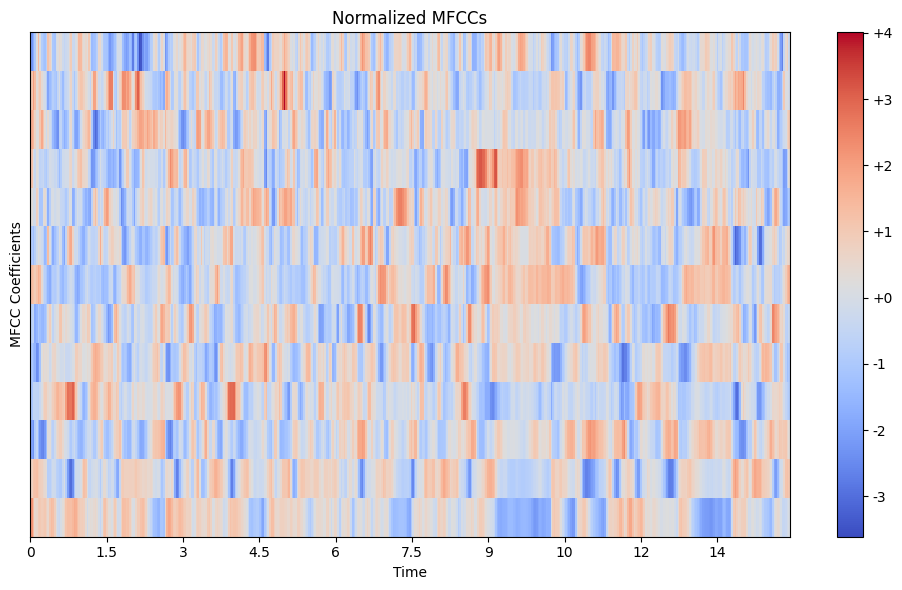

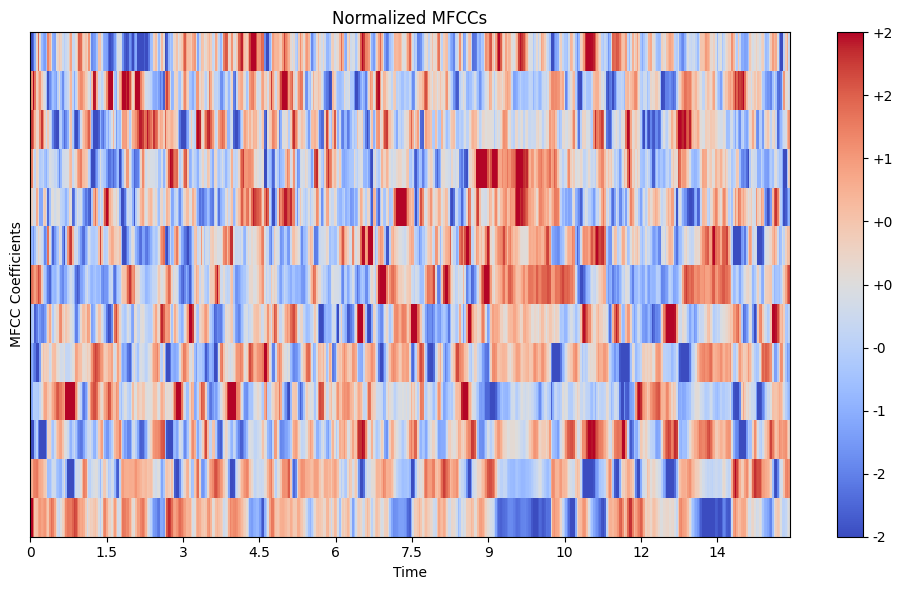

In [5]:
# Import necessary libraries
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the speech audio file
file_path = './Data/speech_4.wav'  
y, sr = librosa.load(file_path, sr=None)

# Compute MFCCs
# MFCC (Mel-Frequency Cepstral Coefficients) are features that represent the short-term power 
# spectrum of an audio signal, modeled on human auditory perception.
n_mfcc = 13  
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

# Plot the MFCCs
# The MFCC computation maps frequencies to the Mel scale, which is a perceptual scale based on
# how humans hear sound. Lower frequencies are given more importance, as they are more relevant 
# to speech and vocal characteristics.
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

# Normalize MFCCs to have zero mean and unit variance
mfccs_normalized = (mfccs - np.mean(mfccs, axis=1, keepdims=True)) / np.std(mfccs, axis=1, keepdims=True)

# Plot the normalized MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs_normalized, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f')
plt.title('Normalized MFCCs')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

# Normalize MFCCs with safeguards
std_dev = np.std(mfccs, axis=1, keepdims=True)
std_dev[std_dev == 0] = 1  # Avoid division by zero
mfccs_normalized = (mfccs - np.mean(mfccs, axis=1, keepdims=True)) / std_dev

# Plot the normalized MFCCs with adjusted color scale
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs_normalized, x_axis='time', sr=sr, vmin=-2, vmax=2)
plt.colorbar(format='%+2.0f')
plt.title('Normalized MFCCs')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()